In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate Synthetic Data

In [167]:
np.random.seed(42)

x = np.linspace(0, 10, 100).reshape(-1, 1)
noise = np.random.normal(0, 1, size=x.shape)
y = 2 * x + 5 + noise
y = y.reshape(-1)
original_weights = [2, 5]

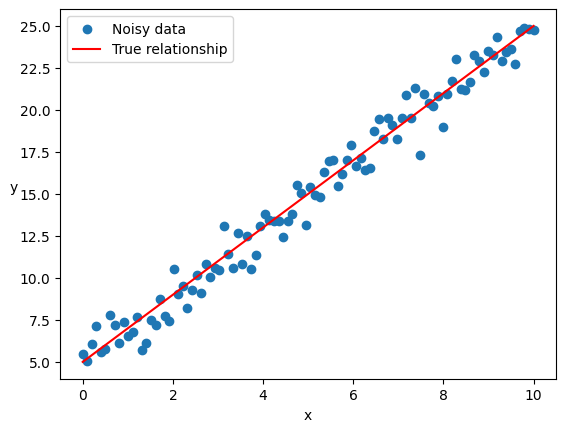

In [168]:
plt.scatter(x, y, label="Noisy data", alpha=1)
plt.plot(x, 2*x + 5, color="red", label="True relationship")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()

In [169]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (100, 1)
y shape: (100,)


## 2. Prepare the Data

In [170]:
x = np.concatenate([np.ones(x.shape), x], axis=1)

In [171]:
x[:5]

array([[1.       , 0.       ],
       [1.       , 0.1010101],
       [1.       , 0.2020202],
       [1.       , 0.3030303],
       [1.       , 0.4040404]])

## 3. Initialize Parameters

In [172]:
weights = np.zeros(2)
weights.shape

(2,)

## 4. Implement Gradient Descent

In [173]:
def MSE(y, x, w):
    return np.mean((y - x @ w) ** 2)

def calculate_gradient(y, x, w):
    return 2 * (x.T @ ((x @ w) - y)) / y.shape[0]

## 5. Run the Training Loop

In [174]:
# reset weights if needed
weights = np.zeros(2)

In [175]:
epochs = 100
learning_rate = 1e-2

In [176]:
losses = []

for i in range(epochs):
    gradient = calculate_gradient(y, x, weights)
    weights = weights - gradient * learning_rate
    loss = MSE(y, x, weights)
    losses.append(loss)
    if (i + 1) % 10 == 0:
        print(f"Loss for epoch {i + 1}: {loss:.3f}")

Loss for epoch 10: 5.313
Loss for epoch 20: 4.886
Loss for epoch 30: 4.501
Loss for epoch 40: 4.152
Loss for epoch 50: 3.835
Loss for epoch 60: 3.549
Loss for epoch 70: 3.290
Loss for epoch 80: 3.056
Loss for epoch 90: 2.844
Loss for epoch 100: 2.651


In [177]:
def plot_losses(losses, lr, plot_from_epoch = 0):
    plt.plot(np.arange(plot_from_epoch, len(losses)), losses[plot_from_epoch:], alpha=1, label=f"Learning rate: {lr}")
    plt.xlabel("epoch")
    plt.ylabel("loss", rotation=0)
    plt.xlim(plot_from_epoch, None)
    plt.autoscale(enable=True, axis='x', tight=False)
    plt.legend()
    plt.show()

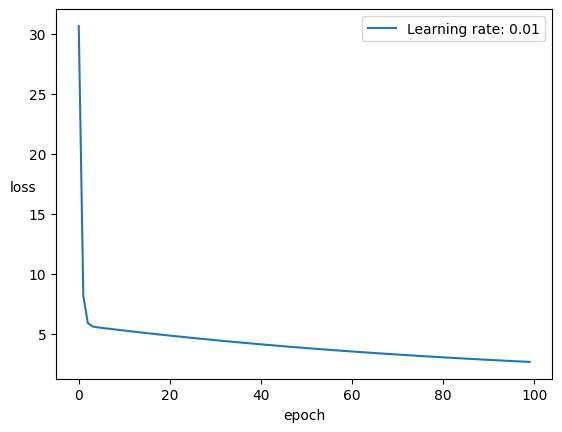

In [178]:
plot_losses(losses, learning_rate)

## 6. Check Your Results

In [202]:
def plot_data(x, y, predicted_weights = None):
    plt.scatter(x[:, 1], y, label="Noisy data", alpha=0.7)
    plt.plot(x[:, 1], 2*x[:, 1] + 5, color="red", label="True relationship")
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)

    if predicted_weights is not None:
        plt.plot(x[:, 1], predicted_weights[1] * x[:, 1] + predicted_weights[0], color="forestgreen", label="Predicted")
        
    plt.legend() 
    plt.show()

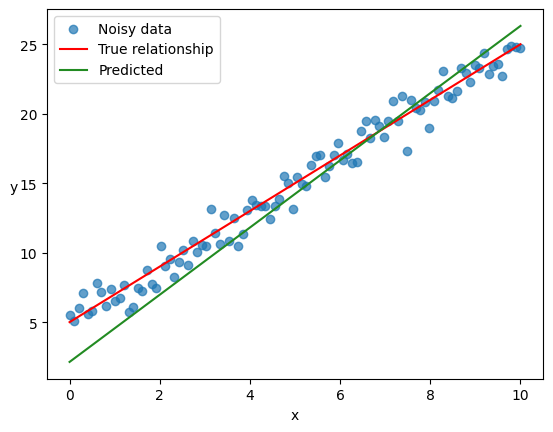

In [180]:
plot_data(x, y, weights)

## 7. Experiment with Learning Rate

In [181]:
learning_rates = np.logspace(-6, -1, 6)
learning_rates

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [182]:
# reset weights if needed
weights = np.zeros(2)

In [183]:
losses = [[] for _ in learning_rates]
final_weights = [None for _ in learning_rates]
for i, lr in enumerate(learning_rates):
    print(f"Starting for learning_rate: {lr}")
    weights = np.zeros(2)
    for _ in range(epochs):
        gradient = calculate_gradient(y, x, weights)
        weights = weights - gradient * lr
        loss = MSE(y, x, weights)
        losses[i].append(loss)
    final_weights[i] = weights
    print(f"Final loss for learning_rate {lr} is {losses[i][-1]:.3f}")

Starting for learning_rate: 1e-06
Final loss for learning_rate 1e-06 is 253.766
Starting for learning_rate: 1e-05
Final loss for learning_rate 1e-05 is 224.982
Starting for learning_rate: 0.0001
Final loss for learning_rate 0.0001 is 69.308
Starting for learning_rate: 0.001
Final loss for learning_rate 0.001 is 5.314
Starting for learning_rate: 0.01
Final loss for learning_rate 0.01 is 2.651
Starting for learning_rate: 0.1
Final loss for learning_rate 0.1 is 694852584023658838733522400063612227708467049755001296966749870243773127379571096253892877254343922471119299680928028024226915139441539415395949688584667136.000


In [184]:
def plot_multiple_losses(losses, learning_rates):
    for i, lr in enumerate(learning_rates):
        plt.plot(losses[i], alpha=1, label=f"Learning rate: {lr}")
    
    plt.xlabel("epoch")
    plt.ylabel("loss", rotation=0)
    plt.legend()
    plt.show()

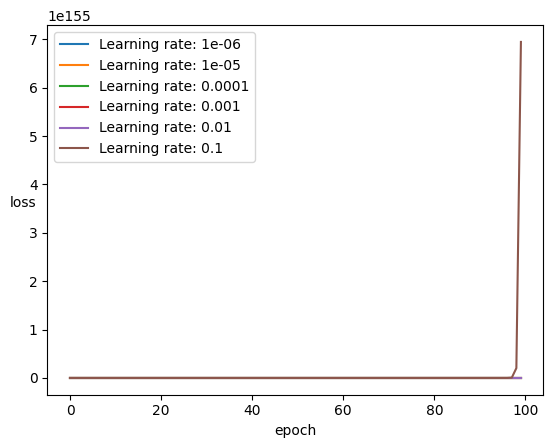

In [185]:
plot_multiple_losses(losses, learning_rates)

Let's skip highest learning rate for now...

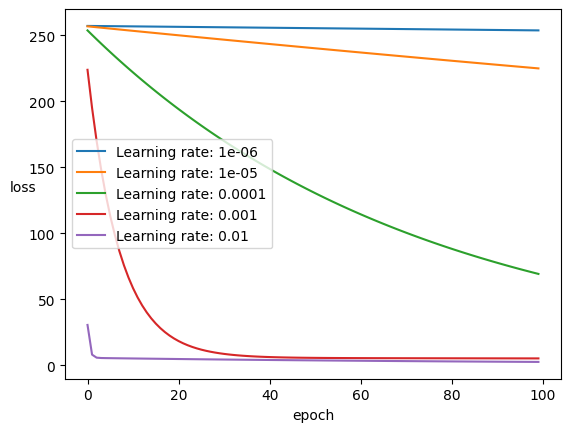

In [186]:
plot_multiple_losses(losses[:-1], learning_rates[:-1])

In [187]:
for i, w in enumerate(final_weights):
    print(f"Final weights values for learning rate {learning_rates[i]} : {w}")

Final weights values for learning rate 1e-06 : [0.00296989 0.01825818]
Final weights values for learning rate 1e-05 : [0.02887656 0.1771161 ]
Final weights values for learning rate 0.0001 : [0.2221638  1.32854252]
Final weights values for learning rate 0.001 : [0.61680235 2.64459946]
Final weights values for learning rate 0.01 : [2.1373177  2.41824253]
Final weights values for learning rate 0.1 : [-2.11773773e+76 -1.40844317e+77]


In [188]:
final_losses = [loss[-1] for loss in losses]
best_loss_index = np.argmin(final_losses)
best_loss = min(final_losses)
best_weights = final_weights[best_loss_index]
best_learning_rate = learning_rates[best_loss_index]

In [189]:
print(f"Best loss is {best_loss} for learning rate {best_learning_rate} with weights: {best_weights}")

Best loss is 2.651323996365394 for learning rate 0.01 with weights: [2.1373177  2.41824253]


For smaller learning rates we need a lot of epochs to get accurate results, but if learning rate is too big we are going further away from good answer with every iteration. There seems to be optimal value for learning rate and it's around 0.01

## 8. Explore Training Duration

In [190]:
epochs = 1000
learning_rate = best_learning_rate
weights = np.zeros(2)

In [191]:
losses = []
weights_tab = []

for i in range(epochs):
    gradient = calculate_gradient(y, x, weights)
    weights = weights - gradient * learning_rate
    weights_tab.append(weights)
    loss = MSE(y, x, weights)
    losses.append(loss)
    if (i + 1) % 250 == 0:
        print(f"Loss for epoch {i + 1}: {loss:.3f}")

Loss for epoch 250: 1.228
Loss for epoch 500: 0.849
Loss for epoch 750: 0.818
Loss for epoch 1000: 0.815


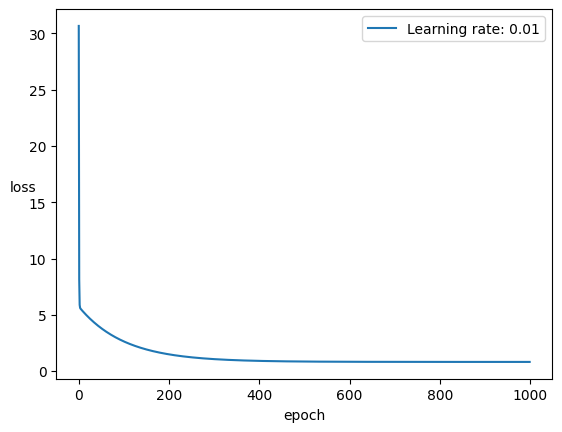

In [192]:
plot_losses(losses, learning_rate)

### Let's start plotting from epoch 300. It will show us better where the loss starts to plateau

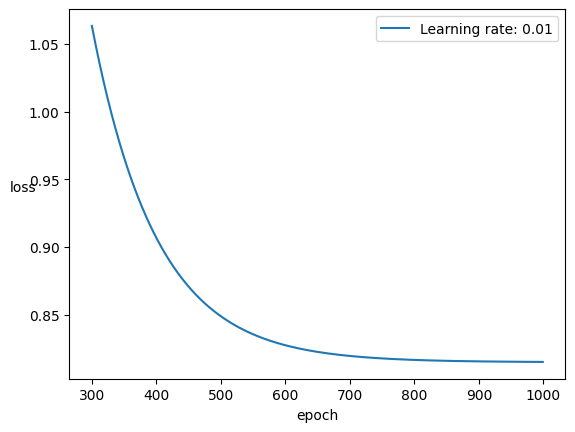

In [193]:
plot_losses(losses, learning_rate, plot_from_epoch=300)

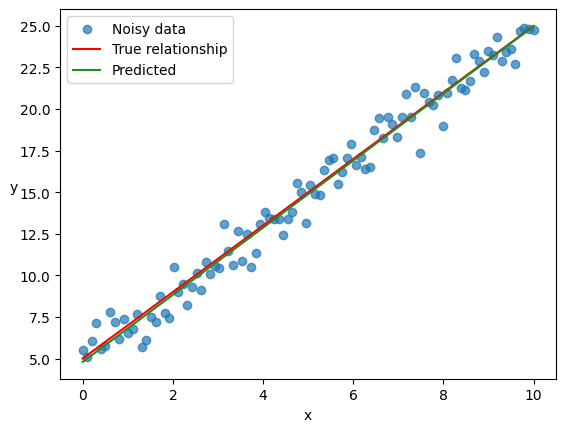

In [203]:
plot_data(x, y, weights_tab[-1])

In [206]:
print(f"Original weights: {original_weights}")
print(f"In epoch {1} weights are: {weights_tab[0]}")
for i in range(99, epochs + 1, 100):
    print(f"In epoch {i+1} weights are: {weights_tab[i]}")

Original weights: [2, 5]
In epoch 1 weights are: [0.29792307 1.83202801]
In epoch 100 weights are: [2.1373177  2.41824253]
In epoch 200 weights are: [3.19183471 2.25968516]
In epoch 300 weights are: [3.83294648 2.16328748]
In epoch 400 weights are: [4.22272141 2.10468085]
In epoch 500 weights are: [4.4596918  2.06904994]
In epoch 600 weights are: [4.60376202 2.04738751]
In epoch 700 weights are: [4.691352   2.03421747]
In epoch 800 weights are: [4.74460383 2.02621051]
In epoch 900 weights are: [4.7769792  2.02134254]
In epoch 1000 weights are: [4.79666236 2.01838298]


In [413]:
best_weights = weights_tab[-1]
best_loss = losses[-1]

The loss is decreasing all the time but with every epoch slower and slower \
I would say that model converges around 900 epoch \
Diminishing returns begins at for me around 700

## 9. Visualize the Loss Landscape

In [398]:
w1_range = np.linspace(-6, 16, 100) # b
w2_range = np.linspace(-3, 6, 100)  # a

In [407]:
loss_values = np.zeros((len(w1_range), len(w2_range)))
for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        loss_values[i, j] = min(400, MSE(y, x, np.array([w1_range[i], w2_range[j]])))

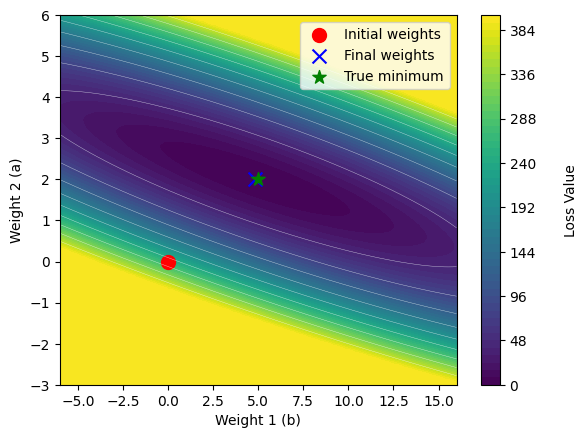

In [408]:
initial_weights = (0, 0)  
final_weights = best_weights 
true_minimum = (5, 2)   

contour = plt.contourf(w1_range, w2_range, loss_values.T, 50, cmap="viridis")
contour_lines = plt.contour(w1_range, w2_range, loss_values.T, 10, colors="white", linewidths=0.3, alpha=0.7)
cbar = plt.colorbar(contour)
cbar.set_label("Loss Value", rotation=90, labelpad=20)

plt.scatter(initial_weights[0], initial_weights[1], color="red", s=100, marker="o", label="Initial weights")
plt.scatter(final_weights[0], final_weights[1], color="blue", s=100, marker="x", label="Final weights")
plt.scatter(true_minimum[0], true_minimum[1], color="green", s=100, marker="*", label="True minimum")

plt.xlabel("Weight 1 (b)")
plt.ylabel("Weight 2 (a)")

plt.legend(loc="upper right")

plt.show()

I did not allow loss bigger then 400 for visual purposes. Loss is much bigger then 400 in yellow region

## 10. Analytical Solution

In [410]:
analytical_weights = np.linalg.inv(x.T @ x) @ x.T @ y
analytical_loss = MSE(y, x, analytical_weights)

In [414]:
print(f"Analytical loss: {analytical_loss}")
print(f"Gradient descent loss: {best_loss}")
print("----------------")
print(f"Analytical weights: {analytical_weights}")
print(f"Gradient descent weights: {best_weights}")

Analytical loss: 0.8149047134980779
Gradient descent loss: 0.8151412045688512
----------------
Analytical weights: [4.82718715 2.01379327]
Gradient descent weights: [4.79666236 2.01838298]


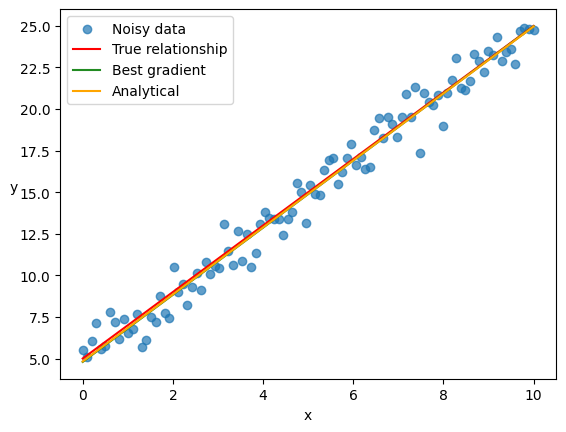

In [416]:
plt.scatter(x[:, 1], y, label="Noisy data", alpha=0.7)

plt.plot(x[:, 1], 2*x[:, 1] + 5, color="red", label="True relationship")
plt.plot(x[:, 1], best_weights[1] * x[:, 1] + best_weights[0], color="forestgreen", label="Best gradient")
plt.plot(x[:, 1], analytical_weights[1] * x[:, 1] + analytical_weights[0], color="orange", label="Analytical")

plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend() 
plt.show()

There are indistinguishable from each other. Differences are negligible

## 11. High Dimensional Example